# Hash Function Distribution Examples
This notebook contains Python code examples for evaluating hash function distribution across buckets.

In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
import hashlib
import statistics

## Utility Function: Bucket Distribution

In [2]:
def bucket_distribution(data, num_buckets, hash_fn):
    buckets = defaultdict(list)
    for item in data:
        bucket = hash_fn(item) % num_buckets
        buckets[bucket].append(item)
    return buckets

## Hash Function Definitions

In [3]:
def poor_hash(key):
    return len(key)

def simple_ascii_sum(key):
    return sum(ord(char) for char in key)

def hash_sha256(key):
    return int(hashlib.sha256(key.encode()).hexdigest(), 16)

## Dataset and Plotting Utility

In [4]:
data = [f"key{i}" for i in range(1000)]
num_buckets = 10

def plot_distribution(title, counts):
    plt.bar(range(len(counts)), counts)
    plt.title(title)
    plt.xlabel("Bucket")
    plt.ylabel("# of Keys")
    plt.show()

## Example 1: Python Built-in hash()

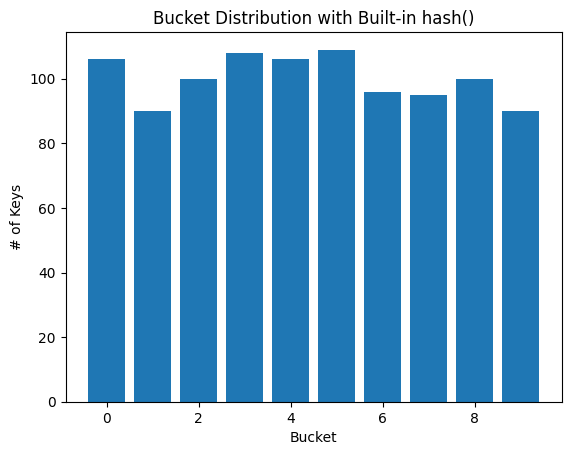

In [5]:
buckets = bucket_distribution(data, num_buckets, hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Bucket Distribution with Built-in hash()", counts)

## Example 2: Poor Hash Function (len of key)

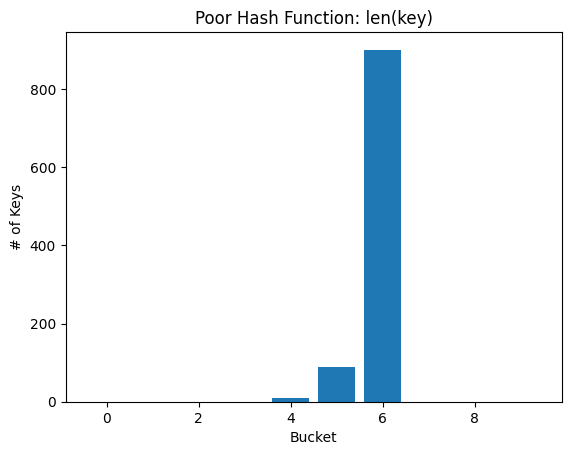

In [6]:
buckets = bucket_distribution(data, num_buckets, poor_hash)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Poor Hash Function: len(key)", counts)

## Example 3: Simple ASCII Sum

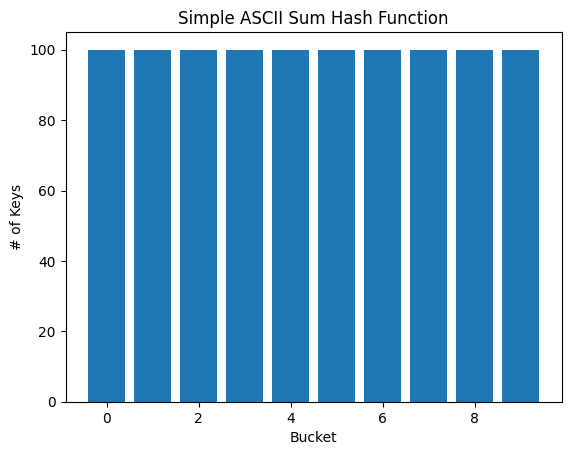

In [10]:
buckets = bucket_distribution(data, num_buckets, simple_ascii_sum)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("Simple ASCII Sum Hash Function", counts)

## Example 4: SHA-256

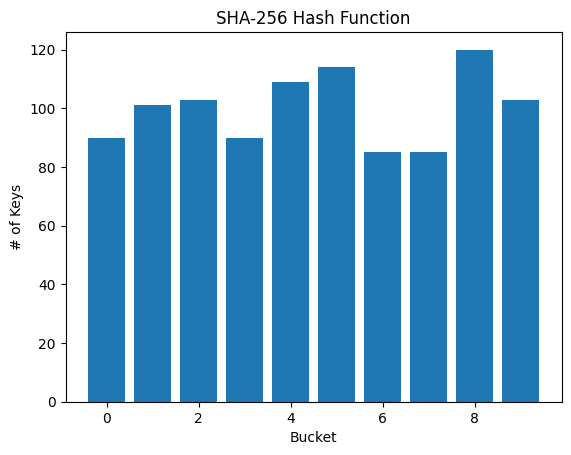

In [8]:
buckets = bucket_distribution(data, num_buckets, hash_sha256)
counts = [len(buckets[i]) for i in range(num_buckets)]
plot_distribution("SHA-256 Hash Function", counts)

## Metrics for Last Distribution

In [9]:
std_dev = statistics.stdev(counts)
max_bucket = max(counts)
collisions = sum(count - 1 for count in counts if count > 1)

print("=== Distribution Metrics ===")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Max Bucket Size: {max_bucket}")
print(f"Collisions: {collisions}")

=== Distribution Metrics ===
Standard Deviation: 12.23
Max Bucket Size: 120
Collisions: 990


In [ ]:
#Reflective Prompt #1:
#1) the simple_ascii_sum I thought
#would be more spread out and even but
#it appeared to be more skewed
#2) I noticed that many keys were only
#in a few buckets, I thought there would be better
#distribution

In [ ]:
#Reflective Prompt #2:
#I would probably focus on core strategies that help to maintain balanced distribution in buckets.
#I'd use the strategy of prime number buckets because in the class notes it avoided repeating patterns unlike the composite numbers.
#Inputs that could break a poorly designed hash function would likely be any structured or predictable inputs like numbers with repeating patterns because they can cause the hash function to break becuase since it is only looking at the beginning or end of the input.
#